In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df = pd.read_csv('bitcoinfinal.csv',header=None,names=['Month','Price'])
df.head()

,Month,Price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


In [7]:
df.shape

(32, 2)

In [9]:
train = df[:29]
test = df[29:]

### Naive method of Forecasting

In [28]:
naive = test.copy()
naive['forecast'] = train['Price'][len(train)-1]

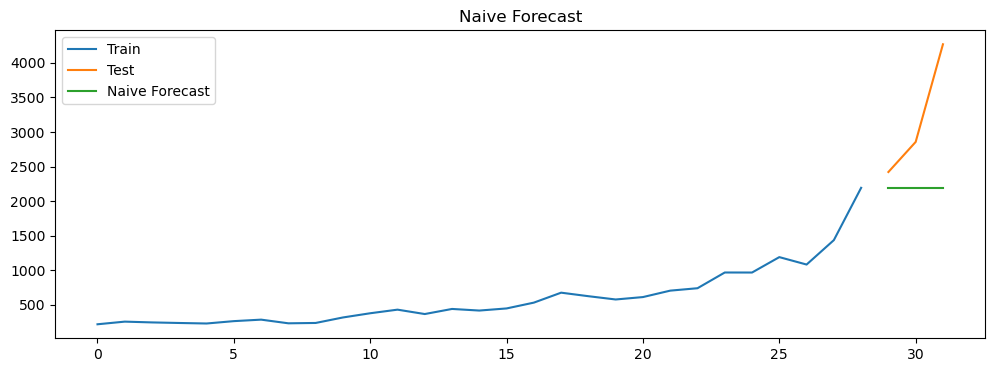

In [30]:
##Plotting the graph for naive method
plt.figure(figsize=(12,4))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(naive['forecast'],label='Naive Forecast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

In [31]:
naive['forecast']

29    2191.8
30    2191.8
31    2191.8
Name: forecast, dtype: float64

In [37]:
#calculating rmse and mape
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(test['Price'],naive['forecast'])),2)
mape = round(np.mean((np.abs(test['Price']-naive['forecast']))/test['Price']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 1265.9
MAPE: 27.12


### Simple Average Forecast 

In [33]:
y_hat_sa = test.copy()
y_hat_sa['sa_forecast'] = np.mean(train['Price'])

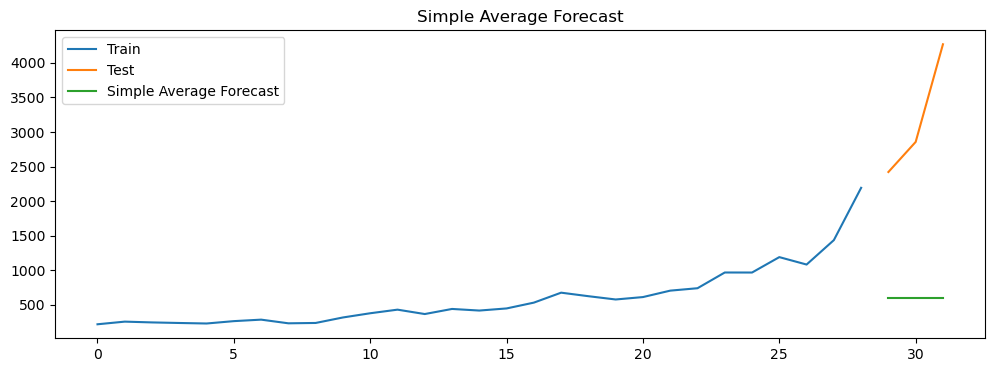

In [34]:
##Plotting the graph for simple average method
plt.figure(figsize=(12,4))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(y_hat_sa['sa_forecast'],label='Simple Average Forecast')
plt.title('Simple Average Forecast')
plt.legend(loc='best')
plt.show()

In [35]:
y_hat_sa

,Month,Price,sa_forecast
29,29,2420.7,595.751724
30,30,2856.0,595.751724
31,31,4268.8,595.751724


In [38]:
#calculating rmse and mape
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(test['Price'],y_hat_sa['sa_forecast'])),2)
mape = round(np.mean((np.abs(test['Price']-y_hat_sa['sa_forecast']))/test['Price']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 2703.73
MAPE: 80.19


- As per the observation clearly the Naive method is superior since the mape and rmse values are much better than that of the simple average method.

### Simple Moving Average

In [45]:
def simple_moving_average(df,rolling_window,train):
    y_hat_sma = df.copy()
    y_hat_sma['sma_forecast'] = df.Price.rolling(rolling_window).mean()
    y_hat_sma['sma_forecast'][len(train):] = y_hat_sma['sma_forecast'][len(train)-1]
    return y_hat_sma

In [48]:
#plotting the graph
def build_graph(y_hat_sma,train,test):
    plt.figure(figsize=(12,4))
    plt.plot(train['Price'],label='Train')
    plt.plot(test['Price'],label='Test')
    plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average Forecast')
    plt.title('Simple Moving Average Forecast')
    plt.legend(loc='best')
    return plt.show(block=False)

In [66]:
# checking out the rmse and mape
def metrics(test,train,y_hat_sma):
    rmse = round(np.sqrt(mean_squared_error(test['Price'],y_hat_sma['sma_forecast'][len(train):])),2)
    mape = round(np.mean((np.abs(test['Price']-y_hat_sma['sma_forecast'][len(train):]))/test['Price']*100),2)
    print('RMSE:',rmse)
    print('MAPE:',mape)
    return rmse,mape

In [72]:
#making a dataframe to store the values
results=pd.DataFrame({'Method':[],'RMSE':[],'MAPE':[]})
def store(Method,RMSE,MAPE,results):
    tempResults = pd.DataFrame({'Method':[Method],'RMSE':[RMSE],'MAPE':[MAPE]})
    results = pd.concat([results,tempResults])
    return results

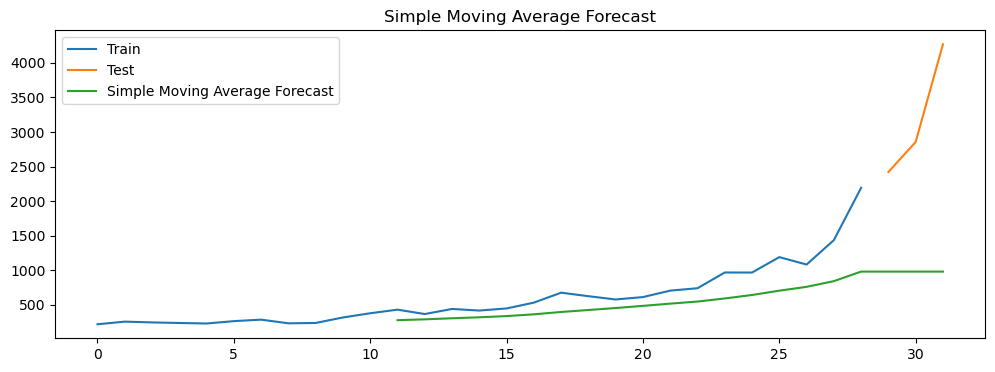

RMSE: 2338.94
MAPE: 67.42


,Method,RMSE,MAPE
0,Simple Moving Average(12),2338.94,67.42


In [76]:
#lets checkout the details for the rolling_window = 12
build_graph(simple_moving_average(df,12,train),train,test)
rmse,mape = metrics(test,train,simple_moving_average(df,12,train))
results = store('Simple Moving Average(12)',rmse,mape,results)
results

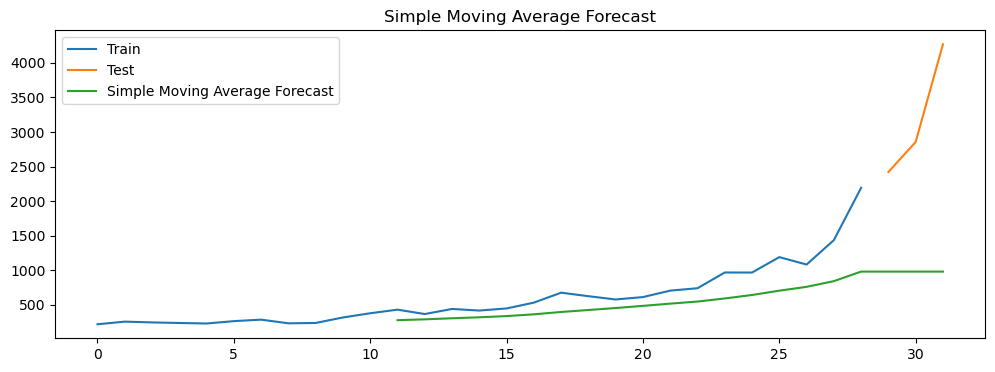

RMSE: 2035.79
MAPE: 56.61
                      Method     RMSE   MAPE
0  Simple Moving Average(12)  2338.94  67.42
0   Simple Moving Average(6)  2035.79  56.61


In [77]:
#lets checkout the details for the rolling_window = 6
build_graph(simple_moving_average(df,12,train),train,test)
rmse,mape  = metrics(test,train,simple_moving_average(df,6,train))
results = store('Simple Moving Average(6)',rmse,mape,results)
print(results)

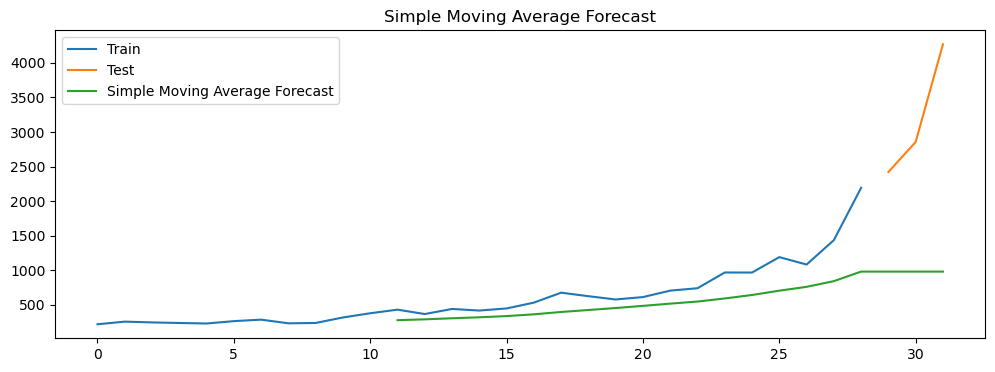

RMSE: 1794.92
MAPE: 47.81
                      Method     RMSE   MAPE
0  Simple Moving Average(12)  2338.94  67.42
0   Simple Moving Average(6)  2035.79  56.61
0   Simple Moving Average(3)  1794.92  47.81


In [78]:
#lets checkout the details for the rolling_window = 3
build_graph(simple_moving_average(df,12,train),train,test)
rmse,mape = metrics(test,train,simple_moving_average(df,3,train))
results = store('Simple Moving Average(3)',rmse,mape,results)
print(results)

### Simple Exponential method

In [81]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.995, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 217.4, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


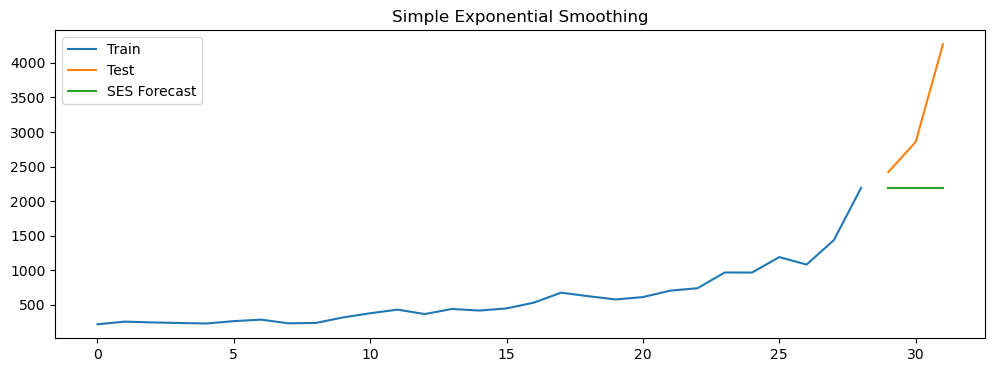

RMSE: 1268.86 
MAPE: 27.25


In [86]:
#Plotting the graph and checking the errors
plt.figure(figsize=(12,4))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(y_hat_ses['ses_forecast'],label='SES Forecast')
plt.title('Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show(block=False)
rmse  = round(np.sqrt(mean_squared_error(test['Price'],y_hat_ses['ses_forecast'])),2)
mape = round(np.mean((np.abs(test['Price']-y_hat_ses['ses_forecast']))/test['Price']*100),2)
print('RMSE:',rmse,'\n''MAPE:',mape)

### Holt's model

In [88]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(np.asarray(train['Price']),trend='additive',seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.995, 'smoothing_trend': 0.4264285714285714, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 222.41999999999987, 'initial_trend': 5.2600000000000176, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [89]:
rmse  = round(np.sqrt(mean_squared_error(test['Price'],y_hat_holt['holt_forecast'])),2)
mape = round(np.mean((np.abs(test['Price']-y_hat_holt['holt_forecast']))/test['Price']*100),2)
tempResults = pd.DataFrame({'Method':['Holts Exponential Smoothing'],'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple Moving Average(12),2338.94,67.42
0,Simple Moving Average(6),2035.79,56.61
0,Simple Moving Average(3),1794.92,47.81
0,Holts Exponential Smoothing,497.91,10.99


### Holt-Winters Additive Method

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(np.asarray(train['Price']),seasonal_periods=3,trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ha = test.copy()
y_hat_ha['ha_additive'] = model_fit.forecast(len(test))
rmse  = round(np.sqrt(mean_squared_error(test['Price'],y_hat_ha['ha_additive'])),2)
mape = round(np.mean((np.abs(test['Price']-y_hat_ha['ha_additive']))/test['Price']*100),2)
tempResults = pd.DataFrame({'Method':['Holts Additive Method '],'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

{'smoothing_level': 0.9950517210446927, 'smoothing_trend': 0.43233248249505807, 'smoothing_seasonal': 9.794185542721287e-05, 'damping_trend': nan, 'initial_level': 207.38376669340138, 'initial_trend': 11.058267257446873, 'initial_seasons': array([-18.44232989,  17.15290339,   1.40628408]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,RMSE,MAPE
0,Simple Moving Average(12),2338.94,67.42
0,Simple Moving Average(6),2035.79,56.61
0,Simple Moving Average(3),1794.92,47.81
0,Holts Exponential Smoothing,497.91,10.99
0,Holts Additive Method,500.38,10.28


### Holt Winters Multiplicative Method

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(np.asarray(train['Price']),seasonal_periods=3,trend='add',seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_m = test.copy()
y_hat_m['m_multiplicative'] = model_fit.forecast(len(test))
rmse  = round(np.sqrt(mean_squared_error(test['Price'],y_hat_m['m_multiplicative'])),2)
mape = round(np.mean((np.abs(test['Price']-y_hat_m['m_multiplicative']))/test['Price']*100),2)
tempResults = pd.DataFrame({'Method':['Holts Multiplicative Method '],'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

{'smoothing_level': 0.9888170810781358, 'smoothing_trend': 0.35692335823192617, 'smoothing_seasonal': 0.0001733376308952478, 'damping_trend': nan, 'initial_level': 192.78976813732518, 'initial_trend': 1.780373946787309, 'initial_seasons': array([1.10166311, 1.26084378, 1.14089546]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,RMSE,MAPE
0,Simple Moving Average(12),2338.94,67.42
0,Simple Moving Average(6),2035.79,56.61
0,Simple Moving Average(3),1794.92,47.81
0,Holts Exponential Smoothing,497.91,10.99
0,Holts Additive Method,500.38,10.28
0,Holts Multiplicative Method,683.59,15.14
